In [36]:
import pandas as pd
import numpy as np
import requests

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"


In [2]:
def ko2genes(ko):
    url = 'http://rest.kegg.jp/link/genes/' + ko
    r = requests.get(url)
    geneKO = pd.DataFrame([x.split('\t') for x in r.text.split('\n')],columns=['ko','gene'])
    geneKO = geneKO.iloc[0:-1]
    return geneKO


In [3]:
coa_kinase = 'K00859'
nad_kinase = 'K00858'

In [4]:
genes_nadk = ko2genes(nad_kinase)
genes_coak = ko2genes(coa_kinase)

In [11]:
genes_nadk['species'] = genes_nadk['gene'].apply(lambda x: x.split(':')[0])
genes_coak['species'] = genes_coak['gene'].apply(lambda x: x.split(':')[0])
genes_nadk['count'] = 1
genes_coak['count'] = 1

In [14]:
genes_nadk = genes_nadk.groupby('species').sum()
genes_coak = genes_coak.groupby('species').sum()


In [16]:
genes_nadk.columns = ['NAD Kinase']
genes_coak.columns = ['CoA Kinase']


In [20]:
df = pd.concat([genes_coak,genes_nadk],axis=1).fillna(0)

In [23]:
df[df['CoA Kinase'] < 1]

,CoA Kinase,NAD Kinase
species,,
aag,0.0,2.0
aalb,0.0,3.0
aam,0.0,2.0
aamb,0.0,1.0
abi,0.0,1.0
...,...,...
woo,0.0,1.0
xla,0.0,4.0
xph,0.0,1.0


In [43]:
tax = pd.read_csv('../assets/kegg/KEGG_taxonomy_Oxygen_Requirement_1430.csv')

In [44]:
g = df.join(tax.set_index('kegg_id')).dropna()

<AxesSubplot:xlabel='NAD Kinase', ylabel='CoA Kinase'>

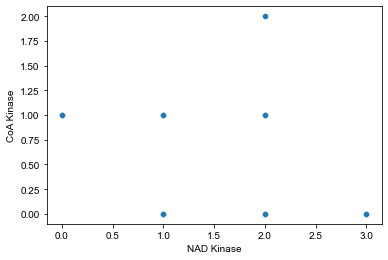

In [45]:
sns.scatterplot(x='NAD Kinase',y='CoA Kinase',data=g)

In [46]:
g[g['NAD Kinase'] < 1].phylum.unique()

array(['Firmicutes', 'Deinococcus-Thermus', 'Spirochaetes', 'Tenericutes',
       'Proteobacteria'], dtype=object)

In [47]:
g[g['NAD Kinase'] < 1].genus.unique()

array(['Clostridium', 'Deinococcus', 'Faecalitalea', 'Leptospira',
       'Mycoplasma', 'Thermus', 'Xanthomonas'], dtype=object)

In [64]:
len(g[g['NAD Kinase'] < 1])

27

In [69]:
gt = g.groupby('oxygen').count()[['species']]

In [55]:
294/ (558 + 556 + 294)

0.20880681818181818

In [70]:
gn = g[g['NAD Kinase'] < 1].groupby('oxygen').count()[['species']]

In [76]:
gt['species'].apply(lambda x: x/sum(x))

TypeError: 'int' object is not iterable

In [80]:
gt['species_frac_all_species'] = gt['species'] / sum(gt['species'])
gn['species_frac_nadkinase'] = gn['species'] / sum(gn['species'])


In [94]:
#sns.barplot(y='species_frac_nadkinase',hue='oxygen',kind='stacked',data=gn.reset_index())

In [92]:
gz = gt[['species_frac_all_species']].join(gn[['species_frac_nadkinase']])

<AxesSubplot:>

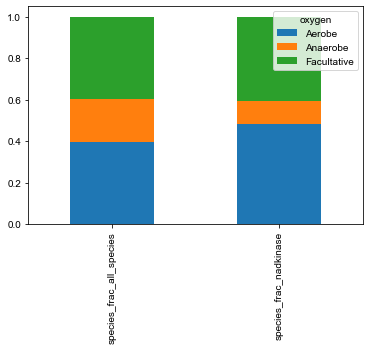

In [93]:
gz.T.plot(kind='bar', stacked=True)

In [95]:
gz

,species_frac_all_species,species_frac_nadkinase
oxygen,,
Aerobe,0.396307,0.481481
Anaerobe,0.208807,0.111111
Facultative,0.394886,0.407407


In [98]:
df[(df['CoA Kinase'] == 0) & (df['NAD Kinase'] == 0)]

,CoA Kinase,NAD Kinase
species,,


In [99]:
df

,CoA Kinase,NAD Kinase
species,,
aaa,1.0,1.0
aab,1.0,1.0
aac,1.0,1.0
aace,1.0,1.0
aaci,1.0,1.0
...,...,...
woo,0.0,1.0
xla,0.0,4.0
xph,0.0,1.0
